# Задача 1

In [156]:
import pandas as pd
import numpy as np
import random

train = pd.read_csv('/Users/Hoderu/lab2_machinelearning/adult.data.txt', header = None, sep = ',')
test = pd.read_csv('/Users/Hoderu/lab2_machinelearning/adult.test.txt', header = None, sep = ',')

In [157]:
test.columns = train.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                    'hours-per-week', 'native-country', 'result']

In [158]:
test[:5]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [159]:
len(train)

32561

In [160]:
train.shape

(32561, 15)

С помощью get_dummies переведем категориальные признаки в бинарные

In [161]:
test.index = test.index + len(train)
data = pd.concat([train, test])

def categorial_to_binom(dataFrame):
    dataFrame['result'] = dataFrame['result'].apply(lambda x: 0 if x[1] == "<" else 1)
    dataFrame = pd.get_dummies(dataFrame)
    return dataFrame

data = categorial_to_binom(data)
data = data.iloc[np.random.permutation(len(data))]

In [164]:
data[:5]

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,result,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
43387,23,250630,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30513,17,187539,7,0,0,10,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3980,55,106707,12,0,0,20,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
40431,49,68493,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3059,40,164663,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Разобьем в отношении 50:30:20

In [162]:
train = data[len(data) // 2:]
test = data[len(data) // 2 : len(data) // 10 * 8]
validation = data[:len(data) // 10 * 8]

# Задача 2

In [163]:
%matplotlib inline
from matplotlib import pyplot

# Age

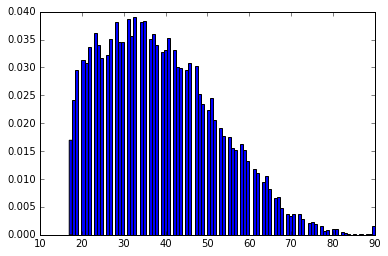

In [200]:
pyplot.hist(train['age'], normed = True, bins = 100)
pyplot.show()

Распределение age напоминает нормальное

# fnlwgt

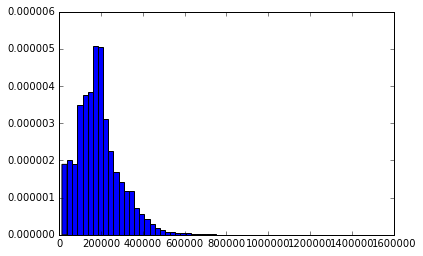

In [201]:
pyplot.hist(train['fnlwgt'], normed = True, bins = 60)
pyplot.show()

Распределение fnlwgt напоминает симметричное экспоненциальное распределение

# education-num

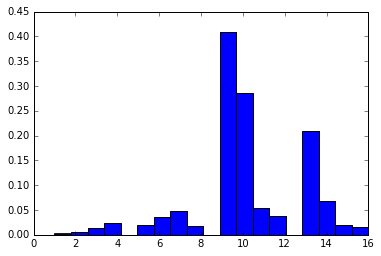

In [202]:
pyplot.hist(train['education-num'], normed = True, bins = 19)
pyplot.show()

Распределение education-num напоминает нормальное

# capital-gain

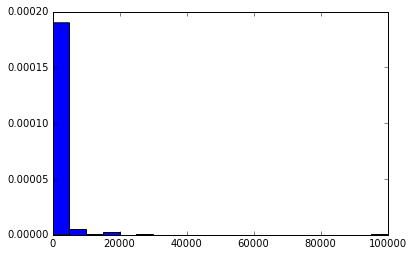

In [203]:
pyplot.hist(train['capital-gain'], normed = True, bins = 20)
pyplot.show()

Ничего не напоминает

# capital-loss

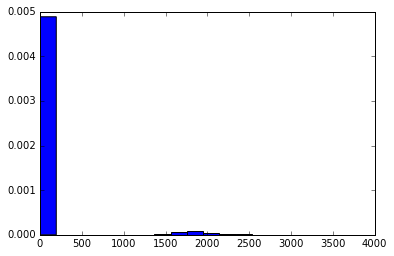

In [204]:
pyplot.hist(train['capital-loss'], normed = True, bins = 20)
pyplot.show()

Ничего не напоминает

# hours-per-week

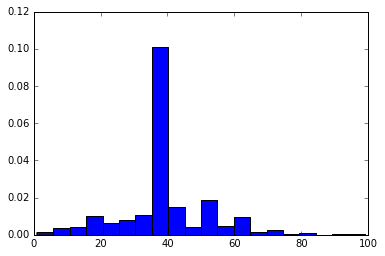

In [207]:
pyplot.hist(train['hours-per-week'], normed = True, bins = 20)
pyplot.show()

Ничего не напоминает

# Задача 3

In [210]:
def bootstrap_sample(dataFrame, n):
    return [dataFrame.sample(len(dataFrame), replace = True) for _ in range(n)]

Возьмем 20 bootstrap выборок по train выборке

In [211]:
bootstrap_train = bootstrap_sample(train, 20)

# Задание 4

Ниже приведена функция подсчета отклонения среднего ответа обученного алгоритма от ответа идеального алгоритма и разброса ответов обученного алгоритма относительно среднего ответа.  

In [234]:
def calculationBiasVariance(estimator, bootstrap_train, test):
    X_test = np.asarray(test.drop('result', axis = 1))
    Y_test = np.asarray(test['result']).ravel()
    testResults = []
    for train in bootstrap_train:
        X_train = np.asarray(train.drop('result', axis = 1))
        Y_train = np.asarray(train['result']).ravel()
        estimator.fit(X_train, Y_train)
        predictedTest = estimator.predict(X_test)
        testResults.append(predictedTest)
    testResults = np.asarray(testResults)
    testResultsAverage = np.mean(testResults, axis=0)
    bias = (Y_test - testResultsAverage) ** 2
    variance = np.mean((testResults - testResultsAverage) ** 2, axis=0)
    return np.mean(bias), np.mean(variance)

# Задача 5

In [235]:
from sklearn.neighbors import KNeighborsClassifier

Будем строить графики для bias и variance, зависящие от параметров KNeighborsClassifier и DecisionTreeClassifier. Красная линия - смещение метода обучения. Зеленая - разброс ответов. Синяя - error.

In [236]:
def bias_variance_error_plot(rg, biases, variances):
    biases = np.array(biases)
    variances = np.array(variances)
    errors = biases + variances
    pyplot.plot(rg, biases, 'red')
    pyplot.plot(rg, variances, 'green')
    pyplot.plot(rg, errors, 'blue')
    pyplot.show()

Исследуем зависимость bias, varience, error для алгоритма KNN.
Зависимость от n_neighbours:

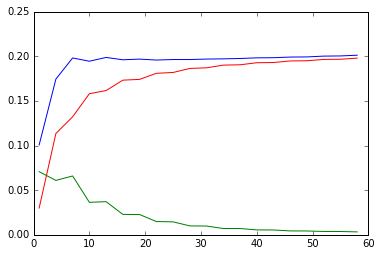

In [241]:
neighbors_range = list(range(1, 60, 3))
biases = []
variances = []

for n_neighbors in neighbors_range:
    estimator = KNeighborsClassifier(n_neighbors = n_neighbors, n_jobs = -1)
    bias, variance = getBiasVariance(estimator, bootstrap_train, test)
    biases.append(bias)
    variances.append(variance)
    
bias_variance_error_plot(neighbors_range, biases, variances)

Чем больше соседей - тем больше bias и меньше variance. Такая картина совпадает с теоретическими ожиданиями. Среднее значение оценки с ростом числа соседей все больше отличается от реального. И результат слабо зависит от выбора bootstrap-выборки.

Теперь построим зависимость от степени метрики Минковского.

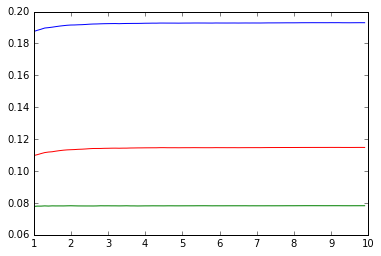

In [245]:
p_range = np.arange(1, 10, 0.1)
biases = []
variances = []

for p in p_range:
    estimator = KNeighborsClassifier(p = p, n_jobs = -1)
    bias, variance = getBiasVariance(estimator, bootstrap_train, test)
    biases.append(bias)
    variances.append(variance)
    
bias_variance_error_plot(p_range, biases, variances)

Зависимости нет.

Далее построим график зависимости от длины обучающей выборки l_train.

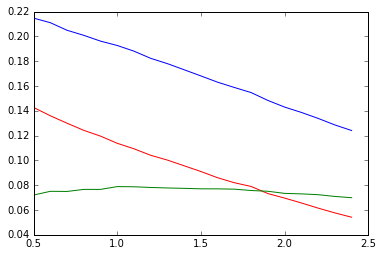

In [248]:
r = np.arange(0.5, 2.5, 0.1)
biases = []
variances = []

for i in r:
    estimator = KNeighborsClassifier(n_jobs = -1)
    train_bootstrap = [train.sample(int(len(train) * i), replace = True) for _ in range(20)]
    bias, variance = getBiasVariance(estimator, train_bootstrap, test)
    biases.append(bias)
    variances.append(variance)

bias_variance_error_plot(r, biases, variances)

Явной зависимости нет.

А теперь рассмотрим DecisionTreeClassifier.

In [249]:
bootstrap_train = bootstrap_sample(train, 20)

Для начала исследуем зависимость от параметра max_depth

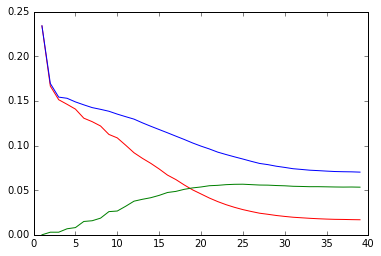

In [251]:
from sklearn.tree import DecisionTreeClassifier

max_depths = list(range(1, 40))
biases = []
variances = []

for i in max_depths:
    estimator = DecisionTreeClassifier(max_depth = i, presort = True)
    bias, variance = getBiasVariance(estimator, bootstrap_train, test)
    biases.append(bias)
    variances.append(variance)
    
bias_variance_error_plot(max_depths, biases, variances)

Variance возрастает, bias убывает. Теоретичиски понятно, с ростом глубины дерева растет сложность самой модели.

Рассмотрим минимальное число объектов обучающей выборке в листе.

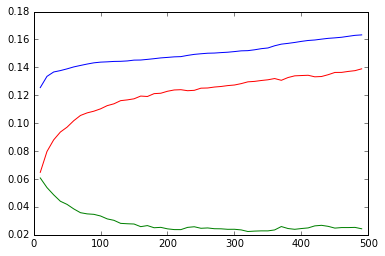

In [253]:
min_samples_leafs = list(range(10, 500, 10))
biases = []
variances = []

for i in min_samples_leafs:
    estimator = DecisionTreeClassifier(min_samples_leaf = i)
    bias, variance = getBiasVariance(estimator, bootstrap_train, test)
    biases.append(bias)
    variances.append(variance)
    
bias_variance_error_plot(min_samples_leafs, biases, variances)

Bias возрастает, variance убывает. 

Найдем зависимость от длины обучающей выборки. Убедимся, что никакой зависимости нет.

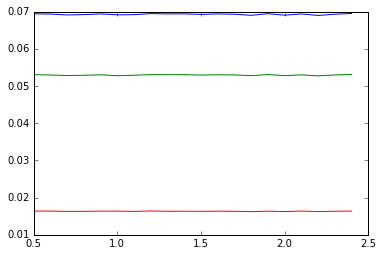

In [254]:
r = np.arange(0.5, 2.5, 0.1)
biases = []
variances = []

for i in r:
    estimator = DecisionTreeClassifier()
    train_bootstrap = [train.sample(int(len(train) * i), replace = True) for _ in range(20)]
    bias, variance = getBiasVariance(estimator, bootstrap_train, test)
    biases.append(bias)
    variances.append(variance)
    
bias_variance_error_plot(r, biases, variances)

# Задание 6

А теперь проведем мини-эксперимент по определению оптимальных параметров для kNN и DecisionTree на выборке validation.

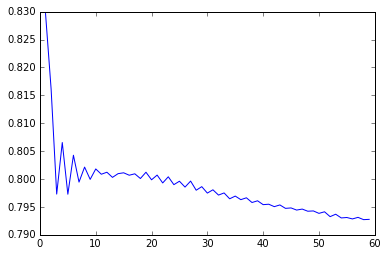

In [257]:
neighbors_range = list(range(1, 60))
scores = []
X_train = np.asarray(train.drop('result', axis = 1))
Y_train = np.asarray(train['result']).ravel()
X_validation = np.asarray(validation.drop('result', axis = 1))
Y_validation = np.asarray(validation['result']).ravel()

for neighbor in neighbors_range:
    estimator = KNeighborsClassifier(n_neighbors = neighbor, n_jobs = -1)
    estimator.fit(X_train, Y_train)
    scores.append(estimator.score(X_validation, Y_validation))

pyplot.plot(neighbors_range, scores)
pyplot.show()

Оптимальным значением является 19.

Для значения параметра метрики Минковского.

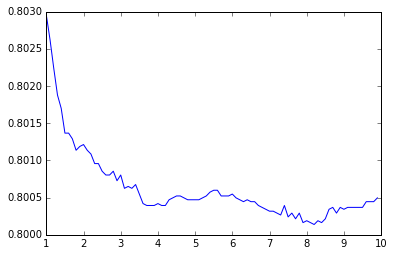

In [258]:
p_range = np.arange(1, 10, 0.1)
scores = []

for p in p_range:
    estimator = KNeighborsClassifier(n_neighbors = 19, p = p, n_jobs = -1)
    estimator.fit(X_train, Y_train)
    scores.append(estimator.score(X_validation, Y_validation))

pyplot.plot(p_range, scores)
pyplot.show()

Оптимальным является 1.

In [296]:
X_test = np.asarray(test.drop('result', axis=1))
Y_test = np.asarray(test['result']).ravel()
    
estimator = KNeighborsClassifier(n_neighbors = 19, p = 1, n_jobs = -1)
estimator.fit(X_train, Y_train)
print(estimator.score(X_test, Y_test))

0.811412190294


# Итого качество классификации 0.8114

Проделаем тот же подбор для решающих деревьев.

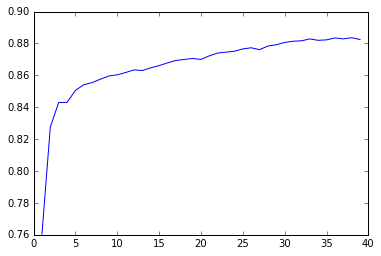

In [261]:
max_depths = list(range(1, 40))
scores = []

for i in max_depths:
    estimator = DecisionTreeClassifier(max_depth = i)
    estimator.fit(X_train, Y_train)
    scores.append(estimator.score(X_validation, Y_validation))
    
pyplot.plot(max_depths, scores)
pyplot.show()

Оптимальным значением для глубины является 13.

Теперь для минимального числа объектов обучающей выборки в листе. 

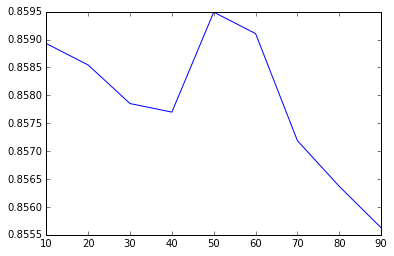

In [263]:
min_samples_leafs = list(range(10, 100, 10))
scores = []

for i in min_samples_leafs:
    estimator = DecisionTreeClassifier(max_depth = 13, min_samples_leaf = i)
    estimator.fit(X_train, Y_train)
    scores.append(estimator.score(X_validation, Y_validation))
    
pyplot.plot(min_samples_leafs, scores)
pyplot.show()

Оптимальное значение 50.

In [290]:
estimator = DecisionTreeClassifier(max_depth = 19, min_samples_leaf = 50)
estimator.fit(X_train, Y_train)
print(estimator.score(X_test, Y_test))

0.867108047232


# Итого качество классификации 0.8671

# Итого получили, используя алгоритм kNN, - 81%, а алгоритм DecisionTree 86.7%

# Оптимальные значения параметров для kNN: n_neighbors = 19, p = 1


# Оптимальные значения для DecisionTree: max_depth = 19, min_samples_leaf = 50